In [1]:
import pandas as pd
import os
import seaborn as sns
from windrose import WindroseAxes
import windrose

In [2]:
station = "01886"
filepath = f"{os.getcwd()}/{station}.pkl"

In [3]:
df = pd.read_pickle(filepath)

In [30]:
stations = ["01886", "02886", "03402", "04887", "15444"]
dfs = []
for s in stations:
    filepath = f"{os.getcwd()}/{s}.pkl"
    dfs.append(pd.read_pickle(filepath))

dfs = [df.WS for df in dfs]
df = pd.concat(dfs, axis=1)
df.columns = stations

<AxesSubplot:ylabel='Density'>

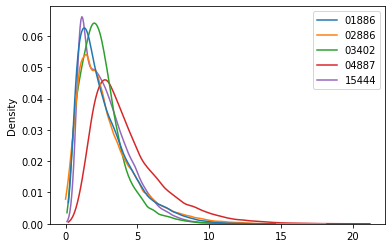

In [38]:
sns.kdeplot(data=df, cut=0)

In [4]:
df_rose = df.copy()
df_rose = df_rose.dropna()
df_rose2 = df_rose.drop(["T", "RH"], axis=1)


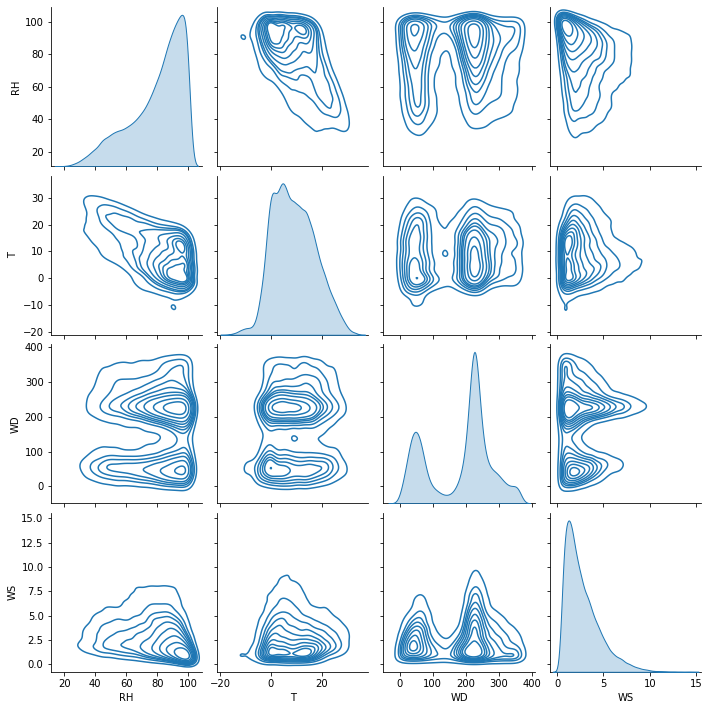

In [5]:
sns.pairplot(df_rose, kind="kde")

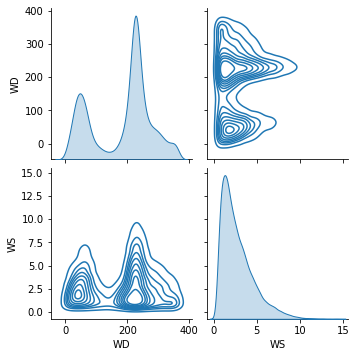

In [28]:
sns.pairplot(df_rose2, kind="kde")

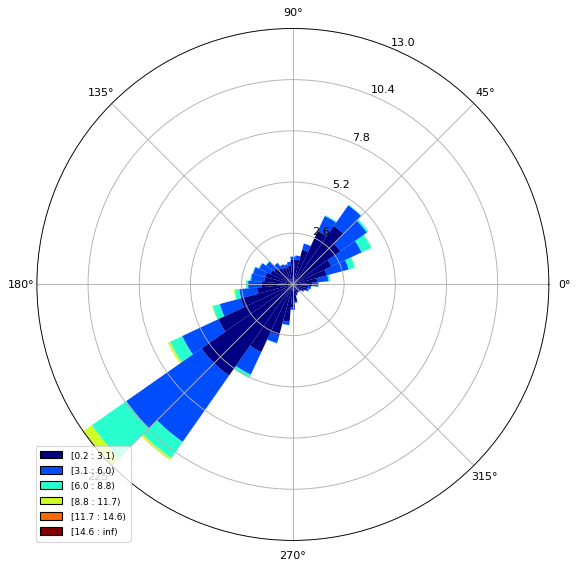

In [27]:
ax = WindroseAxes.from_ax()
ax.bar(df_rose["WD"].to_numpy(), df_rose["WS"].to_numpy(), normed=True, nsector=36, opening=1)
ax.set_legend()